In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.sparse as sp
import scipy.sparse.linalg as spl
from numba import jit
from scipy import spatial


## Triangles

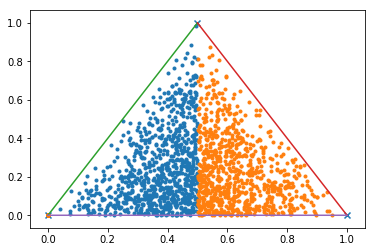

In [3]:
#Vertices
x0=0;x1=1;x2=0.5;y0=0;y1=0;y2=1
x=[x0,x1,x2]
y=[y0,y1,y2]
plt.scatter(x,y,marker='x')


#Edges
n=5000
xp0=np.linspace(x0,x2,n)
xp1=np.linspace(x2,x1,n)
yp0=np.linspace(y1,y2,n)
yp1=np.linspace(y2,y1,n)

# Find Points inside triangle
pt_int0 = np.zeros((n,2))
pt_int1 = np.zeros((n,2))

i=0
for xi,yi in zip(xp0,yp0):
    ptx0 = (0.5)*np.random.rand(1) + 0.0
    pty0 = (1.0)*np.random.rand(1) + 0.0
    if ptx0 >= xi and pty0 <= yi:
         pt_int0[i,:]=np.array([ptx0,pty0]).flatten()
    i+=1
i=0
for xi,yi in zip(xp1,yp1):
    ptx1 = (1.0-0.5)*np.random.rand(1) + 0.5
    pty1 = (1.0)*np.random.rand(1) + 0.0
    if ptx1 <= xi and pty1 <= yi:
         pt_int1[i,:]=np.array([ptx1,pty1]).flatten()
    i+=1
np.where()
plt.plot((pt_int0.T)[0],(pt_int0.T)[1],'.')
plt.plot((pt_int1.T)[0],(pt_int1.T)[1],'.')
plt.plot(xp0,yp0,'-')
plt.plot(xp1,yp1,'-')
plt.plot(xp0*2,np.zeros(n),'-')

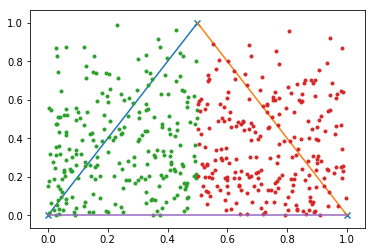

In [99]:
def triside(y,x,b):
    a = (y.max()-y.min())/(x.max() - x.min()) 
    return a*x - b

#Vertices
x0=0;x1=1;x2=0.5;y0=0;y1=0;y2=1
x=[x0,x1,x2]
y=[y0,y1,y2]
plt.scatter(x,y,marker='x')


#Edges
n=500
xp0=np.linspace(x0,x2,n)
xp1=np.linspace(x2,x1,n)
yp0=np.linspace(y1,y2,n)
yp1=np.linspace(y2,y1,n)

# Find Points inside triangle
ptx0 = (0.5)*np.random.random(n) + 0.0
pty0 = (1.0)*np.random.random(n) + 0.0
ptx1 = (1.0-0.5)*np.random.random(n) + 0.5
pty1 = (1)*np.random.random(n) + 0
   
ind_below0 = np.where(pty0 < triside(yp0,xp0,0))
ind_below1 = np.where(pty1 < triside(yp1,xp1,1))
plt.plot(xp0,yp0,'-')
plt.plot(xp1,yp1,'-')
plt.plot(ptx0[ind_below0],pty0[ind_below0],'.')
plt.plot(ptx1[ind_below1],pty1[ind_below1],'.')
# plt.plot(ptx0,pty0,'.')
# plt.plot(ptx1,pty1,'.')
plt.plot(xp0*2,np.zeros(n),'-')

In [176]:
x0 = -2; xn = 4; n = 35
y0 = -2; yn = 2;
z0 = -2; zn = 2;
xi = np.linspace(x0,xn,n)
yi = np.linspace(y0,yn,n)
zi = np.linspace(z0,zn,n)
# theta = np.linspace(0,2*np.pi,n)
# xx = np.outer((np.sqrt(xi**2+yi**2)),np.cos(theta))
# yy = np.outer((np.sqrt(xi**2+yi**2)),np.sin(theta))
# zz = np.outer(np.ones(n),zi)
# yi = (np.sqrt(zn**2-z0**2))*np.cos(theta)
xx,yy,zz = np.meshgrid(xi,yi,zi)
# xx = (xn-x0)*np.random.rand(n,n,n) + x0
# yy = (yn-y0)*np.random.rand(n,n,n) + y0
# zz = (zn-z0)*np.random.rand(n,n,n) + z0
x = xx.flatten(); y = yy.flatten(); z = zz.flatten()

# idxy = np.where(np.sqrt(x**2 + y**2) >= 1)
idxyz = np.where(np.sqrt(x**2 + y**2 + z**2) >= 1)

In [179]:
%matplotlib qt5

In [65]:
np.arange(x0,xn,hx+1)

array([-2.00000000e+01, -1.88253968e+01, -1.76507937e+01, -1.64761905e+01,
       -1.53015873e+01, -1.41269841e+01, -1.29523810e+01, -1.17777778e+01,
       -1.06031746e+01, -9.42857143e+00, -8.25396825e+00, -7.07936508e+00,
       -5.90476190e+00, -4.73015873e+00, -3.55555556e+00, -2.38095238e+00,
       -1.20634921e+00, -3.17460317e-02,  1.14285714e+00,  2.31746032e+00,
        3.49206349e+00,  4.66666667e+00,  5.84126984e+00,  7.01587302e+00,
        8.19047619e+00,  9.36507937e+00,  1.05396825e+01,  1.17142857e+01,
        1.28888889e+01,  1.40634921e+01,  1.52380952e+01,  1.64126984e+01,
        1.75873016e+01,  1.87619048e+01,  1.99365079e+01,  2.11111111e+01,
        2.22857143e+01,  2.34603175e+01,  2.46349206e+01,  2.58095238e+01,
        2.69841270e+01,  2.81587302e+01,  2.93333333e+01,  3.05079365e+01,
        3.16825397e+01,  3.28571429e+01,  3.40317460e+01])

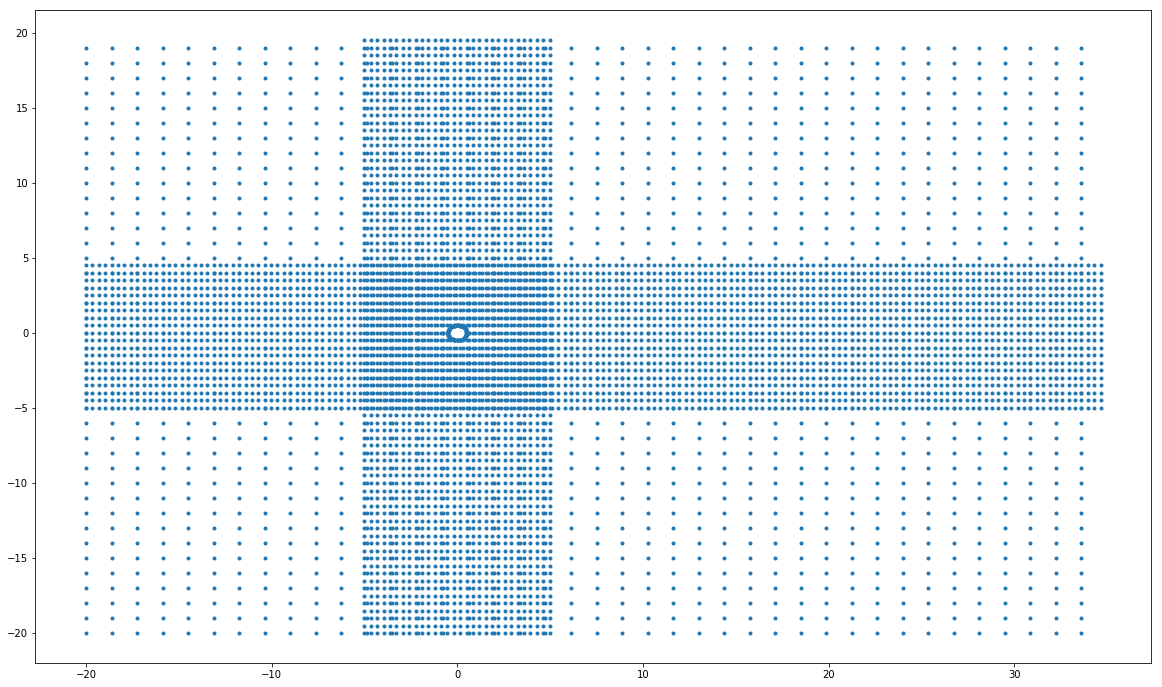

In [70]:
#channel block
x0 = -20; xn = 35
y0 = -20; yn = 20
nx = 40
ny = 40
hx = (xn - x0) / ( nx )
hy = (yn - y0) / ( ny )
grid = np.meshgrid(np.arange(x0,xn,hx),np.arange(y0,yn,hy))
x = grid[0].flatten(); y = grid[1].flatten()

#channel block 2
hx /= 4
hy /= 2
grid2 = np.meshgrid(np.arange(x0,xn,hx),np.arange(-5,5,hy))
x2 = grid2[0].flatten(); y2 = grid2[1].flatten()

#channel block 3
grid3 = np.meshgrid(np.arange(-5,5,hx),np.arange(y0,yn,hy))
x3 = grid3[0].flatten(); y3 = grid3[1].flatten()

#cylinder block 1
r = 0.5
idxy = np.where(np.sqrt(x**2 + y**2 ) >= 1.04*r)
xyz = [x[idxy],y[idxy]]

#cylinder block 2
idxy2 = np.where(np.sqrt(x2**2 + y2**2) >= 1.03*r)
xyz2 = [x2[idxy2],y2[idxy2]]

#cylinder block 3
idxy3 = np.where(np.sqrt(x3**2 + y3**2) >= 1.02*r)
xyz3 = [x3[idxy3],y3[idxy3]]


#cylinder block 4 & 5
nth = 40
theta = np.linspace(0,2*np.pi,nth)
xc1 = r*np.cos(theta); yc1 = r*np.sin(theta)
xc2 = 1.01*r*np.cos(theta); yc2 = 1.01*r*np.sin(theta)
xyzc1 = [xc1,yc1]
xyzc2 = [xc2,yc2]
# '''

# merged mesh blocks
xb = np.block([xyz[0],xyz2[0],xyz3[0],xyzc1[0],xyzc2[0]]).flatten()
yb = np.block([xyz[1],xyz2[1],xyz3[1],xyzc1[1],xyzc2[1]]).flatten()
# xb = np.block([xyz2[0],xyz3[0],xyzc1[0],xyzc2[0]]).flatten()
# yb = np.block([xyz2[1],xyz3[1],xyzc1[1],xyzc2[1]]).flatten()


#visualization
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
ax.scatter(xb,yb,marker='.')
# ax.plot_surface(xb.reshape())

In [101]:
# xb.shape,yb.reshape()
# 76369**(3/2)

In [87]:
# #channel block
# x0 = -20; xn = 35
# y0 = -20; yn = 20
# z0 = -20; zn = 20
# nx = 20
# ny = 20
# nz = 20
# hx = (xn - x0) / ( nx + 1 )
# hy = (yn - y0) / ( ny + 1 )
# hz = hy
# grid = np.meshgrid(np.arange(x0,xn,hx),np.arange(y0,yn,hy),np.arange(z0,zn,hz))
# x = grid[0].flatten(); y = grid[1].flatten(); z = grid[1].flatten()

# #channel block 2
# hx /= 4
# hy /= 2
# hz /= 2
# grid2 = np.meshgrid(np.arange(x0,xn,hx),np.arange(-5,5,hy),np.arange(-5,5,hz))
# x2 = grid2[0].flatten(); y2 = grid2[1].flatten(); z2 = grid2[2].flatten()

# #channel block 3
# grid3 = np.meshgrid(np.arange(-5,5,hx),np.arange(y0,yn,hy),np.arange(-5,5,hz))
# x3 = grid3[0].flatten(); y3 = grid3[1].flatten(); z3 = grid3[2].flatten()

# #sphere block 1
# r = 0.5
# idxy = np.where(np.sqrt(x**2 + y**2 + z**2) >= 1.04*r)
# xyz = [x[idxy],y[idxy],z[idxy]]

# #sphere block 2
# idxy2 = np.where(np.sqrt(x2**2 + y2**2 + z2**2) >= 1.03*r)
# xyz2 = [x2[idxy2],y2[idxy2],z2[idxy2]]

# #sphere block 3
# idxy3 = np.where(np.sqrt(x3**2 + y3**2 + z3**2) >= 1.02*r)
# xyz3 = [x3[idxy3],y3[idxy3],z3[idxy3]]


# nth = 60
# theta = np.linspace(0,2*np.pi,nth)
# phi = np.linspace(0,np.pi,nth)
# xs1 = r*np.outer(np.cos(theta),np.sin(phi)); 
# ys1 = r*np.outer(np.sin(theta),np.sin(phi))
# zs1 = r*np.outer(np.ones(nth),np.cos(phi));
# xs2 = 1.01*xs1 
# ys2 = 1.01*ys1
# zs2 = 1.01*zs1
# xyzs1 = [xs1.flatten(),ys1.flatten(),zs1.flatten()] 
# xyzs2 = [xs2.flatten(),ys2.flatten(),zs2.flatten()]

# '''
# rn = 0.5; r0 = 0
# golden_angle = np.pi * (3 - np.sqrt(5))
# theta = golden_angle * np.arange((nth+1)**2)
# z3 = np.linspace(rn - (1.0 / (nth+1)**2), (1.0 / (nth+1)**2) + z0, (nth+1)**2)
# r3 = np.sqrt(rn - z3* z3)
# xyz=[r3*np.cos(theta),r3*np.sin(theta),z3]
# '''

# # merged mesh blocks
# # xb = np.block([xyz[0],xyz2[0],xyzs1[0],xyzs2[0]]).flatten()
# # yb = np.block([xyz[1],xyz2[1],xyzs1[1],xyzs2[1]]).flatten()
# # zb = np.block([xyz[2],xyz2[2],xyzs1[2],xyzs2[2]]).flatten()
# xb = np.block([xyz[0],xyz2[0],xyz3[0],xyzc1[0],xyzc2[0]]).flatten()
# yb = np.block([xyz[1],xyz2[1],xyz3[1],xyzc1[1],xyzc2[1]]).flatten()
# zb = np.block([xyz[2],xyz2[2],xyz3[2],xyzs1[2],xyzs2[2]]).flatten()
# print(xb.shape,yb.shape,zb.shape)
# #visualization
# fig=plt.figure(figsize=(20,12))
# ax=fig.add_subplot(1,1,1,projection='3d')
# ax.scatter(xb,yb,zb,marker='.')

----------

In [ ]:
## $$$$

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$



The $u$-momentum equation:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x} \\
& \qquad +\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

The $v$-momentum equation:

$$
\begin{split}
& \frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y} \\
& \qquad +\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

And the pressure equation:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

### $$\Delta u^{n} \approx \frac{u_{i-1,j}^{n} + u_{i+1,j}^{n} -2u_{i,j}}{h_x^{2}}+\frac{u_{i,j-1}^{n} + u_{i,j+1}^{n} -2u_{i,j}}{h_y^{2}} $$
### $$\Delta v^{n} \approx \frac{v_{i-1,j}^{n} + v_{i+1,j}^{n} -2v_{i,j}}{h_x^{2}}+\frac{v_{i,j-1}^{n} + v_{i,j+1}^{n} -2v_{i,j}}{h_y^{2}} $$

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2(\Delta x^2+\Delta y^2)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t} \left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

In [27]:
# p[i,j] = ((p[i+1,j] + p[i-1,j])*hy**2 + (p[i,j+1] + p[i,j-1])*hx**2)/(2*(hx**2 + hy**2)) -\
#         rho*((hx**2 * hy**2 )/(2*(hx**2 + hy**2 ))) *((1/dt)*(gradxu(u,i,j,hx) + gradyu(v,i,j,hy)) -\
#                                                       ( gradxu(u,hx,i,j)**2 + 2*(gradyu(u,hy,i,j)*gradxu(v,hx,i,j)) + gradyu(v,hy,i,j)**2))


In [21]:

### $$u^{n}\partial_x u^{n} + v^{n}\partial_y u^{n} \approx u_{i,j}^{n}\frac{ u_{i+1,j}^{n} + u_{i-1,j}^{n}}{2h_x } + v_{i,j}^{n}\frac{ u_{i,j+1}^{n} + u_{i,j-1}^{n}}{2h_y } $$
### $$u^{n}\partial_x v^{n} + v^{n}\partial_y v^{n} \approx u_{i,j}^{n}\frac{ v_{i+1,j}^{n} + v_{i-1,j}^{n}}{2h_x } + v_{i,j}^{n}\frac{ v_{i,j+1}^{n} + v_{i,j-1}^{n}}{2h_y } $$

### $$u^{n}\partial_x u^{n} + v^{n}\partial_y u^{n} \approx u_{i,j}^{n}\frac{ u_{i+1,j}^{n} + u_{i,j}^{n}}{h_x } + v_{i,j}^{n}\frac{ u_{i,j+1}^{n} + u_{i,j-1}^{n}}{h_y } $$
### $$u^{n}\partial_x v^{n} + v^{n}\partial_y v^{n} \approx u_{i,j}^{n}\frac{ v_{i-1,j}^{n} + v_{i,j}^{n}}{h_x } + v_{i,j}^{n}\frac{ v_{i,j-1}^{n} + v_{i,j-1}^{n}}{h_y } $$

### $$b_{-1} = \frac{\alpha}{2}(\alpha + 1)$$
### $$b_{0} = (1- \alpha^{2} )$$
### $$b_{1} = \frac{\alpha}{2}(\alpha - 1)$$
### $$u_{i,j}^{n+1} = b_{-1} u_{i-1,j}^{n} + b_{0} u_{i,j}^{n} + b_{1} u_{i+1,j}^{n} $$
### $$u_{i,j}^{n+1} = b1_{-1} v_{i-1,j}^{n} + b1_{0} v_{i,j}^{n} + b1_{1} v_{i+1,j}^{n} $$

In [18]:
def sorloops(u,f,m,omega,h):
    err=0.0
    for jj in range(1,m+1):
            for kk in range(1,m+1):
                u[jj,kk] = (0.25*omega)*(u[jj-1,kk]+u[jj+1,kk]+u[jj,kk-1]+\
                                       u[jj,kk+1]-(h**2)*f[jj,kk]) + (1.0-omega)*u[jj,kk]
    res=np.zeros((m+1,m+1))
    for jj in range(1,m):
            for kk in range(1,m):
                res[jj,kk]= np.abs(f[jj,kk] - (-4*u[jj,kk]+u[jj-1,kk] \
                          +u[jj+1,kk]+u[jj,kk-1]+u[jj,kk+1])/(h**2))
    
    return u,res


In [17]:
def poissonsor(f,g,a,b,m):
    h=(b-a)/(m+1)
    omegaopt = 2.0/(1.0+np.sin(np.pi*h))

    #Mesh construction
    x = np.linspace(a,b,m+2)
    y = x
    X,Y = np.meshgrid(x,y)
    u = np.zeros((m+2,m+2))
    
    end1 = m+1
    end2 = m+2
    idx = np.arange(1,end2)
    idy = np.arange(1,end2)
    
    #Boundary Conditions 
    ubs = g(X[0,0:end2],Y[0,0:end2])
    ubn = g(X[end1,0:end2],Y[end1,0:end2])
    ube = g(X[idy,end1],Y[idy,end1])
    ubw = g(X[idy,0],Y[idy,0])
    
    u[0,:end2] = ubs
    u[end1,:end2] = ubn
    u[idx,end1] = ube
    u[idx,0] = ubw
    
    #RHS
    f = f(X,Y)
    
    # residual control and iterations
    tol = 1e-8
    nrmf = norm2(f.flatten())
    maxiter=10000
    itr=0
    for i in range(maxiter):
        u,res=sorloops(u,f,m,omegaopt,h)
        itr+=1
        err=norm2(res)
        if err <= tol*nrmf:
            break;
    return u,X,Y

In [107]:

# #Differentiation Matrices
# hx = (xn-x0)/(n+1)
# hx = (yn-y0)/(n+1)
# # l1 = [1]*(n-1)
# # l0 = [-2]*(n)

# # D2 = sp.diags( [l1,l0,l1], [-1,0,1], format='csr')

# # I = sp.eye(n)
# # D2y = (hy**-2)*sp.kron(I,D2)
# # D2x = (hx*-2)*sp.kron(D2,I)
# # L =  (D2x+D2y)



In [231]:
@jit(nopython=True)
def sorppeloops(u,v,p,rho,dt,nx,ny,hx,hy):

    omega = 0.2
    tol = 1e-4
    maxiter = 10000
    gradxu = np.zeros((nx,ny))
    gradyu = np.zeros((nx,ny))
    gradxv = np.zeros((nx,ny))
    gradyv = np.zeros((nx,ny))
    gradxu[idx,idy] = ( u[idx+1,idy] - u[idx-1,idy] )/(2*hx)
    gradyu[idx,idy] = ( u[idx,idy+1] - u[idx,idy-1] )/(2*hy)
    gradxv[idx,idy] = ( u[idx+1,idy] - u[idx-1,idy] )/(2*hx)
    gradyv[idx,idy] = ( u[idx,idy+1] - u[idx,idy-1] )/(2*hy)

#     for ii in range(maxiter):
#         for i in range(1,nx+1):
#             for j in range(1,ny+1):
#                 p[i,j] = (0.25*omega)*(((p[i+1,j] + p[i-1,j])*hy**2 + (p[i,j+1] + p[i,j-1])*hx**2)/(2*(hx**2 + hy**2)) -\
#                 rho*((hx**2 * hy**2 )/(2*(hx**2 + hy**2 ))) *((1/dt)*(gradxu[i,j] + gradyv[i,j]) -\
#                 ( gradxu[i,j]**2 + 2*(gradyu[i,j]*gradxv[i,j] + gradyv[i,j]**2)))) + (1-omega)*p[i,j]

#         res = np.zeros((nx+1,ny+1))
#         for i in range(1,nx):
#             for j in range(1,ny):
#                 res[i,j] = np.abs(p[i,j] - ((0.25*omega)*(((p[i+1,j] + p[i-1,j])*hy**2 + (p[i,j+1] + p[i,j-1])*hx**2)/(2*(hx**2 + hy**2)) -\
#                 rho*((hx**2 * hy**2 )/(2*(hx**2 + hy**2 ))) *((1/dt)*(gradxu[i,j] + gradyv[i,j]) -\
#                 ( gradxu[i,j]**2 + 2*(gradyu[i,j]*gradxv[i,j] + gradyv[i,j]**2))) + (1-omega)*p[i,j]))
    print("\r iteration = %d"%ii , end = " ")
#     if norm(res) <= tol:
#         print("\r residual = %g"%norm(res) , end = " ")
#         break;
    return p


## 1st Order
$${\displaystyle \qquad \qquad u_{x}^{-}={\frac {u_{i}^{n}-u_{i-1}^{n}}{\Delta x}}\,,\qquad u_{x}^{+}={\frac {u_{i+1}^{n}-u_{i}^{n}}{\Delta x}}}$$

## 2nd Order
$$\qquad \qquad u_x^- = \frac{3u_i^n - 4u_{i-1}^n + u_{i-2}^n}{2\Delta x}$$
$${\displaystyle \qquad \qquad u_{x}^{+}={\frac {-u_{i+2}^{n}+4u_{i+1}^{n}-3u_{i}^{n}}{2\Delta x}}}$$

In [358]:
u.max(1)

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [365]:
# %%writefile navstokes.py
def poibicgstab(f,hy,hx,nx,ny):

    # Sparse Differentiation Matrices (2D Discrete Laplacian)
    l1x=[1]*(nx-1)
    l0x=[-2]*(nx)
    l1y=[1]*(ny-1)
    l0y=[-2]*(ny)
	
    D2_x=sp.diags( [l1x,l0x,l1x], [-1,0,1], format='csr')
    D2_y=sp.diags( [l1y,l0y,l1y], [-1,0,1], format='csr')

    I_x=sp.eye(nx)
    I_y=sp.eye(ny)
    D2x=(hx**-2)*sp.kron(D2_x,I_y)
    D2y=(hy**-2)*sp.kron(I_x,D2_y)
    L=(D2x+D2y)

    #RHS
    f=np.reshape(f,nx*ny)
    
    #krylov methods
    ubicgs,itr=spl.bicgstab(L,f,tol=1e-5)
    print("\r iter = %d"%itr , end = " ")
    
    return ubicgs.reshape(nx,ny)

def lap(u,idx,idy,hx,hy):
	return (u[idx + 1 ,idy] + u[ idx - 1, idy ] - 2*u[idx,idy] )/(hx**2 )+\
	(u[idx , idy + 1 ] + u[ idx , idy - 1 ] -2*u[idx,idy] )/(hy**2)

# def upwindord1(u,vel,idx,idy,hx,hy):
#     if vel[0].min() > 0 and vel[1].min() > 0:
#         return vel[0][idx,idy]*( u[idx , idy] - u[idx - 1, idy ] )/(hx) +\
#                    vel[1][idx,idy]*( u[idx , idy  ] - u[idx  , idy - 1])/(hy)
    
#     elif vel[0].min() > 0 and vel[1].min() < 0:
#         return vel[0][idx,idy]*( u[idx , idy] - u[  idx - 1, idy ] )/(hx) +\
#                    vel[1][idx,idy]*( u[ idx , idy + 1 ] - u[ idx , idy ])/(hy)
    
#     elif vel[0].min() < 0 and vel[1].min() > 0:
#         return vel[0][idx,idy]*( u[idx + 1 , idy] - u[idx , idy ] )/(hx) +\
#                    vel[1][idx,idy]*( u[idx , idy ] - u[idx  , idy - 1 ])/(hy)
    
#     else:
#         return vel[0][idx,idy]*( u[idx + 1 , idy] - u[idx , idy ] )/(hx) +\
#                    vel[1][idx,idy]*( u[idx + 1 , idy ] - u[idx  , idy ])/(hy)


def upwindord1(u,vel,idx,idy,hx,hy):
    return vel[0][idx,idy]*( u[idx , idy] - u[idx - 1, idy ] )/(hx) +\
               vel[1][idx,idy]*( u[idx , idy  ] - u[idx  , idy - 1])/(hy)

def upwindord2(u,vel,idx,idy,hx,hy):
    return vel[0][idx,idy]*( 3*u[idx , idy] - 4*u[idx - 1, idy ] + u[idx - 2 , idy ])/(2*hx) +\
                   vel[1][idx,idy]*( 3*u[idx , idy] - 4*u[idx , idy - 1 ] + u[idx  , idy - 2 ])/(2*hy)

# def upwindord2(u,vel,idx,idy,hx,hy):
    
#     if vel[0].min() > 0 and vel[1].min() > 0:
#         return vel[0][idx,idy]*( 3*u[idx , idy] - 4*u[idx - 1, idy ] + u[idx - 2 , idy ])/(2*hx) +\
#                    vel[1][idx,idy]*( 3*u[idx , idy] - 4*u[idx , idy - 1 ] + u[idx  , idy - 2 ])/(2*hy)
    
#     elif vel[0].min() > 0 and vel[1].min() < 0:
#         return vel[0][idx,idy]*( 3*u[idx , idy] - 4*u[idx - 1, idy ] + u[idx - 2 , idy ])/(2*hx) +\
#                    vel[1][idx,idy]*( -3*u[idx , idy] + 4*u[idx , idy + 1 ] + u[idx  , idy + 2 ])/(2*hy)
    
#     elif vel[0].min() < 0 and vel[1].min() > 0:
#         return vel[0][idx,idy]*( -3*u[idx , idy] + 4*u[idx + 1, idy ] - u[idx + 2 , idy ])/(2*hx) +\
#                    vel[1][idx,idy]*( 3*u[idx , idy] - 4*u[idx , idy - 1 ] + u[idx  , idy - 2 ])/(2*hy)
    
#     else:
#         return vel[0][idx,idy]*( -3*u[idx , idy] + 4*u[idx + 1, idy ] - u[idx + 2 , idy ])/(2*hx) +\
#                    vel[1][idx,idy]*( -3*u[idx , idy] + 4*u[idx , idy + 1 ] - u[idx  , idy + 2 ])/(2*hy)

def ppe(p,u,v,dt,idx,idy,hx,hy,rho):
    nx2 , ny2 = p.shape
    nx = nx2 - 2; ny = ny2 - 2
    
    def gradxu(u,indx,indy,hx):
        return ( u[indx+1,indy] - u[indx-1,indy] )/(2*hx)

    def gradyu(u,indx,indy,hy):
        return ( u[indx,indy+1] - u[indx,indy-1] )/(2*hy)
    
    # rhs \nabla^{2} p = \partial_x u**2  + 2*\partial_y u*\partial_x v + \partial_y u**2
    rhs = np.zeros((nx+2,ny+2))
    rhs[idx,idy] = rho*((hx**2 * hy**2 )/(2*(hx**2 + hy**2 ))) *\
                    ((1/dt)*(gradxu(u,idx,idy,hx) + gradyu(v,idx,idy,hy)) -\
                    ( gradxu(u,idx,idy,hx)**2 + 2*(gradyu(u,idx,idy,hy)*gradxu(v,idx,idy,hx)) +\
                    gradyu(v,idx,idy,hy)**2))

    # solve pressure poisson equation
    p = poibicgstab(rhs[idx,idy],hy,hx,nx,ny)
#     p,res = sorppe(u,v,p,rho,dt,omega,nx,ny,hx,hy)
    return p


def gradp(p,idx,idy,hx,hy,component):
	if component == 'x':
		return ( p[ idx + 1 , idy ] - p[ idx - 1 , idy ] )/(2*hx)
	else:
		return ( p[ idx , idy + 1 ] - p[ idx , idy - 1 ] )/(2*hy)

nx = 50//2
ny = 50//2
tfinal = 10
dt = 0.001

x0 = -1 ; xn = 2
y0 = -1 ; yn = 1
hy = (yn - y0)/( nx + 1 )
hx = (xn - x0)/( ny + 1 )
u = np.zeros((ny+2,nx+2))
v = np.zeros((ny+2,nx+2))
p = np.zeros((ny+2,nx+2))
xi = np.linspace(x0,xn,nx+2)
yi = np.linspace(y0,yn,ny+2)
xx,yy = np.meshgrid(xi,yi)

# constants
nu = 0.1
rho = 1

# interior indices 
idx = np.arange(1,ny+1).reshape(ny,1)
idy = np.arange(1,nx+1).reshape(1,nx)

# initial/ boundary conditions
u[ : , 0 ] = 1
u[ -1 , :] = 0 
u[ 0 , :] = 0 
u[ : ,-1] = -(-4*u[ : , -2] + u[ : ,-3])/3
p[ : , 0 ] = -(-4*p[ : , 1 ] + p[ : , 2 ])/3
p[ : , -1 ] = 0
p[ 0 , : ] = -(-4*p[ 1 , : ] +  p[ 2 , : ])/3
p[-1 , : ] = -(-4*p[ -2 , : ] + p[-3 , : ])/3

t = 0
while (t < tfinal):

    # solve momentum and pressure equations
    tmpu = u[idx,idy] + dt*(-upwindord2(u,[u,v],idx,idy,hx,hy)+nu*lap(u,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'x'))
    tmpv = v[idx,idy] + dt*(-upwindord2(v,[u,v],idx,idy,hx,hy)+nu*lap(v,idx,idy,hx,hy) -\
            gradp(p,idx,idy,hx,hy,'y'))
#     tmpp = ppe(p,u,v,dt,idx,idy,hx,hy,rho)[idx,idy]

    # update boundary conditions
    u[ : ,-1 ] = -(-4*u[ : ,-2] + u[ : ,-3])/3
#     u[ : ,-1 ] = u[ : ,-2]
    u[ -1 , : ] = 0 
    u[ 0 , : ] = 0 
    p[ : , 0 ] = -(-4*p[ : , 1 ] + p[ : , 2 ])/3
#     p[ : , 0 ] = p[ : , 1 ]
    p[ : , -1 ] = 0
#     p[ 0 , : ] = p[ 1 , : ] 
#     p[-1 , : ] = p[ -2 , : ]

    p[ 0 , : ] = -(-4*p[ 1 , : ] + p[ 2 , : ])/3
    p[-1 , : ] = -(-4*p[ -2 , : ] + p[-3 , : ])/3
    
    tmpp = ppe(p,u,v,dt,idx,idy,hx,hy,rho)
#     [idx,idy]

    # update momentum and pressure for next timestep
    u[idx,idy] = tmpu
    v[idx,idy] = tmpv
    p[idx,idy] = tmpp

    t += dt
    print("\r time = %g"%t , end = " ")

print(" ")
#print(u)
#visualization
# fig=plt.figure(figsize=(20,12))
# ax=fig.add_subplot(1,1,1)
# plt1 = ax.contourf(xx,yy,np.sqrt(u**2+v**2),100,cmap ='viridis')
# fig.colorbar(plt1)
# # plt.savefig('nse.png')



 time = 10.001  


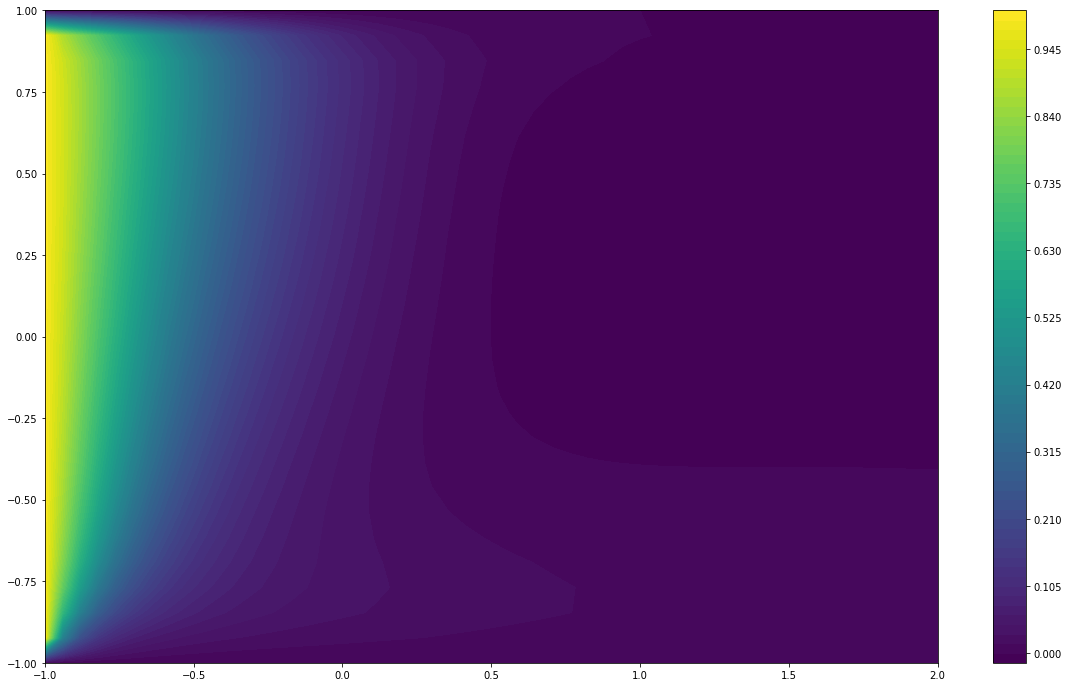

In [363]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(1,1,1)
plt1 = ax.contourf(xx,yy,u,100,cmap ='viridis')
fig.colorbar(plt1)

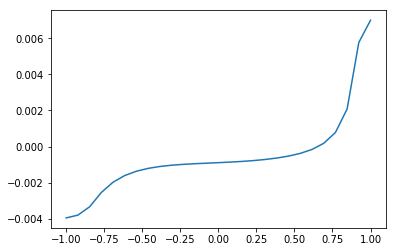

In [361]:
# plt.plot(yi,np.sqrt(u[:,-1]**2 + v[:,-1]**2))
plt.plot(yi,p[:,0])

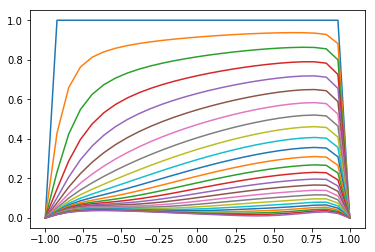

In [362]:
for i in range(ny):
    plt.plot(yi,np.sqrt(u[:,i]**2 + v[:,i]**2))

In [23]:
# import sys
# sys.path.insert(0,'../../rbf/rbfworks/')

In [22]:
# pts_tree = spatial.KDTree(pts_array)  

# # Find RBF-FD weights
# for i in range(npts):
# #     for i in range(4):
#     pxy=pts_array[i]

#     nbrs=pts_tree.query(pxy,k=stencil_size)[1]
#     col_index[i]=nbrs


-----------

In [60]:
# import pygmsh
# geom = pygmsh.built_in.Geometry()

# rectangle = geom.add_rectangle(0.0, 1.0, 0.0, 1.0, 0.0, 0.1)

# mesh = pygmsh.generate_mesh(geom,"quad",dim=2)
# import meshio
# meshio.write('test.vtk', mesh,file_format='vtk')

In [57]:
%%bash
paraview

In [52]:
1*1/0.05

20.0

In [35]:
# %%bash
# ls
# rm *vtk
# mv "test.msh" ../

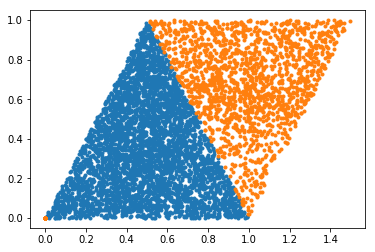

In [190]:
# https://www.geeksforgeeks.org/check-whether-a-given-point-lies-inside-a-triangle-or-not/
# A utility function to calculate area 
# of triangle formed by (x1, y1), 
# (x2, y2) and (x3, y3) 

def area(x1, y1, x2, y2, x3, y3): 

	return abs((x1 * (y2 - y3) + x2 * (y3 - y1) 
				+ x3 * (y1 - y2)) / 2.0) 


# A function to check whether point P(x, y) 
# lies inside the triangle formed by 
# A(x1, y1), B(x2, y2) and C(x3, y3) 
def isInside(x1, y1, x2, y2, x3, y3, x, y): 

	# Calculate area of triangle ABC 
	A = area (x1, y1, x2, y2, x3, y3) 

	# Calculate area of triangle PBC 
	A1 = area (x, y, x2, y2, x3, y3) 
	
	# Calculate area of triangle PAC 
	A2 = area (x1, y1, x, y, x3, y3) 
	
	# Calculate area of triangle PAB 
	A3 = area (x1, y1, x2, y2, x, y) 
	
	# Check if sum of A1, A2 and A3 
	# is same as A 
	if(A == A1 + A2 + A3): 
		return True
	else: 
		return False

# Driver program to test above function 
# Let us check whether the point P(10, 15) 
# lies inside the triangle formed by 
# A(0, 0), B(1, 0) and C(0.5, 1) 
n=10000
pt_inside=np.zeros((n,2))
for i in range(n):
    ptx1 = (1.0)*np.random.random(1) + 0.0 
    pty1 = (1.0)*np.random.random(1) + 0.0
    if (isInside(0, 0, 1, 0, 0.5, 1, ptx1, pty1)): 
        pt_inside[i,:] = np.array([ptx1,pty1]).flatten()

plt.plot((pt_inside.T)[0],(pt_inside.T)[1],'.')

n=10000
pt_inside2=np.zeros((n,2))
for i in range(n):
    ptx2 = (1.5)*np.random.random(1) + 0.0 
    pty2 = (1.5)*np.random.random(1) + 0.0
    if (isInside(1,0, 0.5, 1, 1.5, 1, ptx2, pty2)): 
        pt_inside2[i,:] = np.array([ptx2,pty2]).flatten()

plt.plot((pt_inside2.T)[0],(pt_inside2.T)[1],'.')

----------------

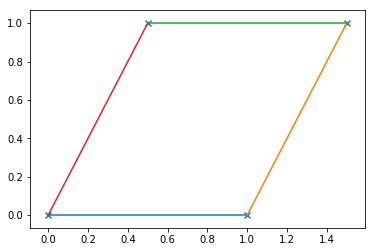

In [180]:
x=[0,1,1.5,0.5]
y=[0,0,1,1]
plt.plot(x[:2],y[:2],'-')
plt.plot(x[1:3],y[1:3],'-')
plt.plot(x[2:4],y[2:4],'-')
plt.plot(x[::-3],y[::-3],'-')
# plt.plot([1,0.5],[0,1],'-')
plt.scatter(x,y,marker='x')


## Member Functions

0.5 0.0 1
0.3535533905932738 0.35355339059327373 1
3.061616997868383e-17 0.5 1
-0.35355339059327373 0.3535533905932738 1
-0.5 6.123233995736766e-17 1
-0.35355339059327384 -0.35355339059327373 1
-9.184850993605148e-17 -0.5 1
0.3535533905932737 -0.35355339059327384 1
0.5 -1.2246467991473532e-16 1


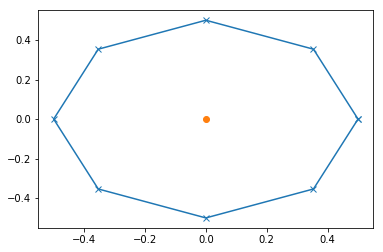

In [204]:
th=np.linspace(0,2*np.pi,9)
x,y=[0.5*np.cos(th),0.5*np.sin(th)]
plt.plot(x,y,'x-')
plt.plot(0,0,'o')
for xs,ys in zip(x,y):
    print(xs,ys,1)

In [120]:
def relerr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))/np.linalg.norm((uexact))

def abserr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))

def cond(A):
    return np.linalg.cond(A)

def norm(M):
    return np.linalg.norm(M,2)

def inv(A):
    return np.linalg.inv(A)

def DM(pts,ctrs):
    return np.abs(np.subtract.outer(pts,ctrs))

def DM2D(x,y):
    return np.sqrt(np.abs(np.subtract.outer(x,x))**2 +\
                   np.abs(np.subtract.outer(y,y))**2)

def DM3D(x,y,z):
    return np.sqrt(np.abs(np.subtract.outer(x,x))**2 +\
                   np.abs(np.subtract.outer(y,y))**2 +\
                   np.abs(np.subtract.outer(z,z))**2)

def DM3D_eval(x,y,z,xe,ye,ze):
    return np.sqrt(abs(np.subtract.outer(xe,x))**(2)+\
                   abs(np.subtract.outer(ye,y))**(2)+\
                   abs(np.subtract.outer(ze,z))**(2))
def reshp(x):
    return x.reshape(len(x),1)

def gesol(lhs,rhs):
    return np.linalg.solve(lhs,rhs)

def reshp(x):
    return x.reshape(len(x),1)

def dm_nd(r,p):
    if len(r) == 1:
        x=r[0]
        return (np.abs(reshp(x)-reshp(x).T)**p)**(1.0/p)
    
    elif len(r) == 2:
        x=r[0].flatten();y=r[1].flatten()
        return (np.abs(reshp(x)-reshp(x).T)**p +\
        np.abs(reshp(y)-reshp(y).T)**p)**(1.0/p)
    
    elif len(r) == 3:
        x=r[0].flatten();y=r[1].flatten();z=r[2].flatten()
        return (np.abs(reshp(x)-reshp(x).T)**p +\
         np.abs(reshp(y)-reshp(y).T)**p +\
         np.abs(reshp(z)-reshp(z).T)**p)**(1.0/p)
    
    else:
        print("No Higher Dimensions Implemented")